# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "" # @param {type:"string"}
name = "Nur Ikhsan Wibowo" # @param {type:"string"}
drive_link = ""  # @param {type:"string"}

assignment_id = "00_ml_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 80% and an F1 score of more than 85%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 75% and an F1 score of more than 80%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 70% and an F1 score between 70% and 80%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 65% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 65% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

In [ ]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [ ]:
# Write your preprocessing and data cleaning here

# Load your data
url = 'https://raw.githubusercontent.com/SoulPerforms/Fifa-21-ML-Project/main/FIFA21_official_data.csv'
fifa_df = pd.read_csv(url)
#set maximal columns displayed
pd.set_option('display.max_columns', None, 'display.max_rows', None)
fifa_df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,€31.5M,€115K,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,6'0,190lbs,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,€87M,€370K,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,€63M,€195K,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,5'10,152lbs,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,NaN,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,€50.5M,€290K,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,"<span class=""pos pos23"">RW",7.0,"Jul 12, 2019",NaN,2024,5'9,161lbs,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,NaN,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,€22M,€41K,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,5'8,152lbs,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,NaN,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [ ]:
# Check your data for empty cell
check_empty_cell = fifa_df.isnull().sum().sort_values(ascending= False)
check_empty_cell.head(21)

Loaned From             16186
Marking                 16166
Release Clause           1629
Joined                   1449
DefensiveAwareness        942
Contract Valid Until      496
Club                      325
Composure                 287
Balance                    39
Curve                      39
Volleys                    39
Jumping                    39
Vision                     39
Agility                    39
SlidingTackle              39
Body Type                  25
Real Face                  25
Jersey Number              20
Position                   20
Interceptions               3
Positioning                 3
dtype: int64

In [ ]:
# Fill the empty cell with data or drop the column
fifa_df = fifa_df.fillna({'Loaned From': 'Not Loaned'})
fifa_df = fifa_df.fillna({'Marking': fifa_df['Marking'].mean()})
fifa_df = fifa_df.fillna({'Release Clause': '0'})
fifa_df['Joined'] = fifa_df['Joined'].fillna(method = 'bfill')
fifa_df = fifa_df.fillna({'DefensiveAwareness': fifa_df['DefensiveAwareness'].mean()})
fifa_df['Contract Valid Until'] = fifa_df['Contract Valid Until'].fillna(method = 'bfill')
fifa_df = fifa_df.fillna({'Club': 'Not on Club'})
fifa_df = fifa_df.fillna({'Composure': fifa_df['Composure'].mean()})
fifa_df = fifa_df.fillna({'Balance': fifa_df['Balance'].mean()})
fifa_df = fifa_df.fillna({'Curve': fifa_df['Curve'].mean()})
fifa_df = fifa_df.fillna({'Volleys': fifa_df['Volleys'].mean()})
fifa_df = fifa_df.fillna({'Jumping': fifa_df['Jumping'].mean()})
fifa_df = fifa_df.fillna({'Vision': fifa_df['Vision'].mean()})
fifa_df = fifa_df.fillna({'Agility': fifa_df['Agility'].mean()})
fifa_df = fifa_df.fillna({'SlidingTackle': fifa_df['SlidingTackle'].mean()})
fifa_df['Body Type'] = fifa_df['Body Type'].fillna(method = 'bfill')
fifa_df = fifa_df.fillna({'Real Face': 'No'})
fifa_df['Jersey Number'] = fifa_df['Jersey Number'].fillna(method = 'bfill')
fifa_df['Position'] = fifa_df['Position'].fillna(method = 'bfill')
fifa_df = fifa_df.fillna({'Interceptions': fifa_df['Interceptions'].mean()})
fifa_df = fifa_df.fillna({'Positioning': fifa_df['Positioning'].mean()})
fifa_df['Height'] = fifa_df['Height'].str.replace("'", ".").astype(float)
fifa_df['Weight'] = fifa_df['Weight'].str.replace("lbs", "").astype(float)

In [ ]:
#clean and convert columns Value, Wage, and Release Clause to get actual number
#Remove '$' and replace 'K' with 1000, 'M' with 1000000
fifa_df[['Value', 'Wage', 'Release Clause']] = fifa_df[['Value', 'Wage', 'Release Clause']].replace({'\€': '', 'K': '*1e3', 'M': '*1e6'}, regex=True)
# Evaluate the expressions and convert to integers
cols_to_convert = ['Value', 'Wage', 'Release Clause']
for column in cols_to_convert:
  fifa_df[column] = fifa_df[column].map(eval).astype(int)

## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below. Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features.

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

In [ ]:
fifa_df.shape

(17108, 65)

In [ ]:
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,OK Player
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,31500000,115000,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",Not Loaned,2022,6.00,190.0,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,46.403397,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,64599999,57.0,1
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,87000000,370000,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",Not Loaned,2023,5.11,154.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,46.403397,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,161000000,68.0,1
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,63000000,195000,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",Not Loaned,2025,5.10,152.0,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,46.403397,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,124400000,72.0,1
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,50500000,290000,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,"<span class=""pos pos23"">RW",7.0,"Jul 12, 2019",Not Loaned,2024,5.90,161.0,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,46.403397,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,103500000,59.0,1
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,22000000,41000,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",Not Loaned,2024,5.80,152.0,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,46.403397,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,46200000,79.0,1


In [ ]:
# Write your code here

# Define the target output (Good >= 75)
fifa_df['OK Player'] = fifa_df['Overall'].apply(lambda x: 1 if x >= 75 else 0)

# Identify the features you will use in your model
ml_features = ['Age', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',	'LongPassing', 'BallControl', 'Acceleration',	'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',	'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']

X = fifa_df[ml_features]
y = fifa_df['OK Player']
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create model
model_forest = RandomForestClassifier()
# Train the model
model_forest.fit(X_train, y_train)

# # Make predictions using the test set
y_pred = model_forest.predict(X_test)
print(f'Prediction from test set: {y_pred[:20]}')

# # Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)
print('Accuracy of the test model is ', ml_accuracy)
print('f1 score of the test model is ', ml_f1_score)


Prediction from test set: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
Accuracy of the test model is  0.9742840444184687
f1 score of the test model is  0.9009009009009009


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11975, 43), (5133, 43), (11975,), (5133,))

Elapsed time to compute the importances: 0.010 seconds


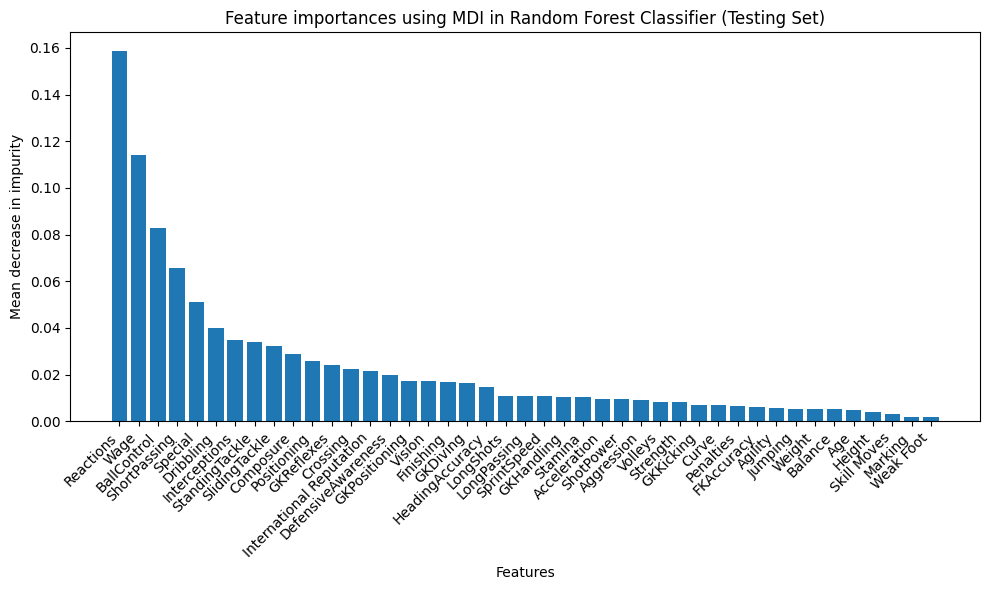

In [ ]:
# Features importance selection based on mean decrease in impurity

#set timer
start_time = time.time()
MDI_importance = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Create a DataFrame to store feature names and their importances
MDI_forest_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': MDI_importance})

# Sort features by importance in descending order
MDI_forest_df = MDI_forest_df.sort_values(by='Importance', ascending=False)

# Plotting the permutation importances
plt.figure(figsize=(10, 6))
plt.bar(range(MDI_forest_df.shape[0]), MDI_forest_df['Importance'], align="center")
plt.xticks(range(MDI_forest_df.shape[0]), MDI_forest_df['Feature'], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mean decrease in impurity")
plt.title("Feature importances using MDI in Random Forest Classifier (Testing Set)")
plt.tight_layout()
plt.show()

Elapsed time to compute the importances: 16.417 seconds


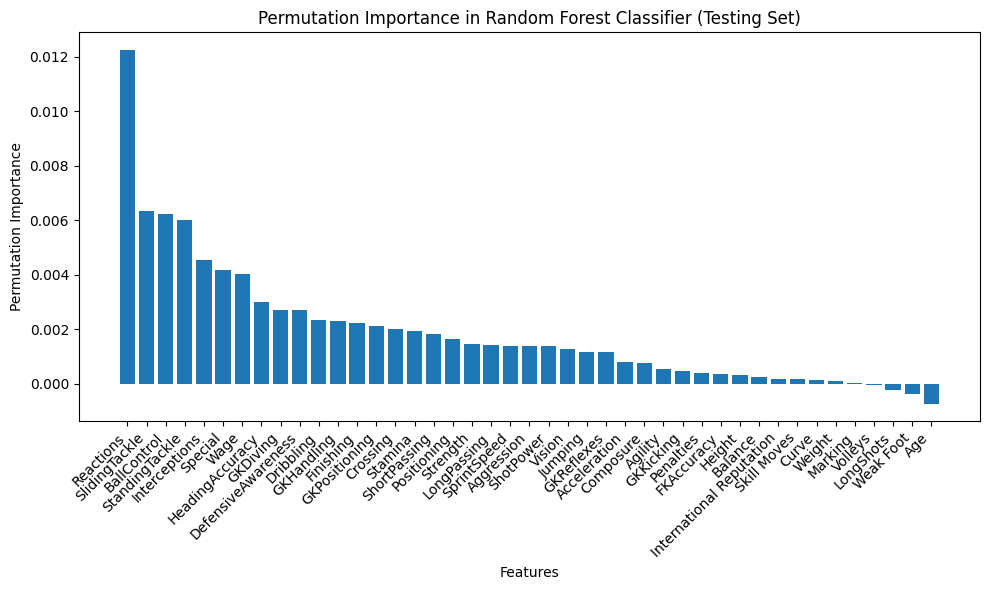

In [ ]:
# Features importance selection based on permutation importance to minimize overfitting model

#set timer
start_time = time.time()
result = permutation_importance(
    model_forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Create a DataFrame to store feature names and their importances
permut_forest_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})

# Sort features by importance in descending order
permut_forest_df = permut_forest_df.sort_values(by='Importance', ascending=False)

# Plotting the permutation importances
plt.figure(figsize=(10, 6))
plt.bar(range(permut_forest_df.shape[0]), permut_forest_df['Importance'], align="center")
plt.xticks(range(permut_forest_df.shape[0]), permut_forest_df['Feature'], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importance in Random Forest Classifier (Testing Set)")
plt.tight_layout()
plt.show()

In [ ]:
#Determine a threshold value, features with importance scores above the threshold wil be considered important
threshold_value = 0.002

#Select important features from permut_forest_df (permutation)
important_features = permut_forest_df[permut_forest_df['Importance'] > threshold_value]['Feature'].tolist()
important_features

['Reactions',
 'SlidingTackle',
 'BallControl',
 'StandingTackle',
 'Interceptions',
 'Special',
 'Wage',
 'HeadingAccuracy',
 'GKDiving',
 'DefensiveAwareness',
 'Dribbling',
 'GKHandling',
 'Finishing',
 'GKPositioning',
 'Crossing']

In [ ]:
#re-train the random forest model using only the important features to reduce the risk of overfitting
# Identify the features you will use in your model
ml_features = important_features

X = fifa_df[ml_features]
y = fifa_df['OK Player']
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create model
model_forest = RandomForestClassifier()
# Train the model
model_forest.fit(X_train, y_train)

# # Make predictions using the test set
y_pred = model_forest.predict(X_test)
print(f'Prediction from test set: {y_pred[:20]}')

# # Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)
print('Accuracy of the test model is ', ml_accuracy)
print('f1 score of the test model is ', ml_f1_score)

Prediction from test set: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
Accuracy of the test model is  0.9713617767387492
f1 score of the test model is  0.8900523560209425


In [ ]:
#Implement Cross Validation to assess the performance of the Random Forest model with selected features
cv_scores = cross_val_score(model_forest, X_train, y_train, cv=5)
print(cv_scores)

#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",cv_scores.mean() * 100)

[0.96826722 0.96701461 0.96534447 0.96158664 0.97077244]
Accuracy of Model with Cross Validation is: 96.65970772442589


In [ ]:
# Perform hyperparameter tuning to find the optimal settings for Random Forest model,
# Grid search or randomized search can help explore different combinations of hyperparameters.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [6, 8, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_forest_model = grid_search.best_estimator_

In [ ]:
best_forest_model

RandomForestClassifier(min_samples_leaf=6, min_samples_split=10)

In [ ]:
#Re-train the model again with new hyperparameter
# Create model
model_forest = RandomForestClassifier(min_samples_leaf=6, min_samples_split=10)
# Train the model
model_forest.fit(X_train, y_train)

# # Make predictions using the test set
y_pred = model_forest.predict(X_test)
print(f'Prediction from test set: {y_pred[:20]}')

# # Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)
print('Accuracy of the test model is ', ml_accuracy)
print('f1 score of the test model is ', ml_f1_score)

Prediction from test set: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
Accuracy of the test model is  0.9699980518215469
f1 score of the test model is  0.8852459016393442


In [ ]:
print(f"RandomForest model train accuracy: {model_forest.score(X_train, y_train):.3f}")
print(f"RandomForest model test accuracy: {model_forest.score(X_test, y_test):.3f}")

RF train accuracy: 0.983
RF test accuracy: 0.970


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11975, 15), (5133, 15), (11975,), (5133,))

In [ ]:
# Additional metrics (classification report and confusion matrix)
print('\nClassification Report (Testing Set):')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix (Testing Set):')
print(confusion_matrix(y_test, y_pred))


Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4450
           1       0.90      0.87      0.89       683

    accuracy                           0.97      5133
   macro avg       0.94      0.93      0.93      5133
weighted avg       0.97      0.97      0.97      5133


Confusion Matrix (Testing Set):
[[4385   65]
 [  89  594]]


In [ ]:
#create learning curve for random forest classifier (not necessary because it is an ensemble model)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model_forest, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
)


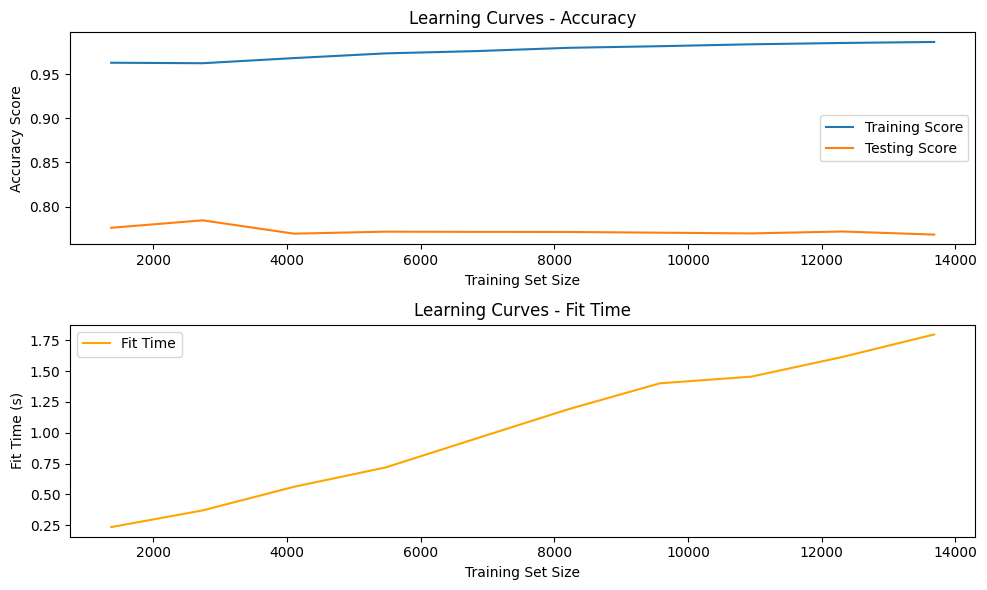

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves - Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Fit Time', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Fit Time (s)')
plt.title('Learning Curves - Fit Time')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(ml_features)
print(ml_accuracy)
print(ml_f1_score)

['Reactions', 'SlidingTackle', 'BallControl', 'StandingTackle', 'Interceptions', 'Special', 'Wage', 'HeadingAccuracy', 'GKDiving', 'DefensiveAwareness', 'Dribbling', 'GKHandling', 'Finishing', 'GKPositioning', 'Crossing']
0.9699980518215469
0.8852459016393442


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [ ]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN